# Time analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Importing and understanding database

In [2]:
crimes = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Crimes_-_2016_to_2020.csv")

In [3]:
crimes.head(20)

,ID,Case Number,Date,Block,Crime_Type,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,MISDEMEANOR,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
1,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN
2,12014684,JD189901,2020-03-17 21:30:00,039XX N LECLAIRE AVE,MISDEMEANOR,THEFT,$500 AND UNDER,STREET,0,0,1634,16.0,45.0,15.0,2020,2020-03-25 15:45:43,41.952052,-87.754660,"(41.952051946, -87.754660372)"
3,11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,2515,25.0,30.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
4,11864018,JC476123,2019-09-24 08:00:00,022XX S MICHIGAN AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,0,0,132,1.0,3.0,33.0,2019,2019-10-20 15:56:02,41.852248,-87.623786,"(41.852248185, -87.623786256)"
5,11859805,JC471592,2019-10-13 20:30:00,024XX W CHICAGO AVE,MISDEMEANOR,THEFT,RETAIL THEFT,GROCERY FOOD STORE,0,0,1221,12.0,26.0,24.0,2019,2019-10-20 16:03:03,41.895732,-87.687784,"(41.895732399, -87.687784384)"
6,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,INFRACTION,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,0,1724,17.0,33.0,14.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
7,11645557,JC212685,2018-04-01 00:01:00,080XX S VERNON AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,631,6.0,6.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
8,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,0,0,2515,25.0,36.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
9,12012127,JD189186,2020-03-18 02:03:00,039XX W JACKSON BLVD,MISDEMEANOR,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,0,1,1132,11.0,28.0,26.0,2020,2020-03-25 15:47:29,41.877110,-87.723990,"(41.877110187, -87.723989719)"


In [4]:
crimes.set_index(crimes.ID, inplace=True)

In [5]:
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1277232.0,NaN,NaN,NaN,11302467.393457,783643.814895,22245.0,10882663.75,11333324.5,11784053.25,12305810.0
Case Number,1277232,1277072,HZ140230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1277232,589815,2016-01-01 00:01:00,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,1277232,34700,001XX N STATE ST,4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime_Type,1277094,4,MISDEMEANOR,626741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,1277232,32,THEFT,294745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1277232,491,SIMPLE,140645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,1271428,190,STREET,286880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1277232.0,NaN,NaN,NaN,0.194647,0.395929,0.0,0.0,0.0,0.0,1.0
Domestic,1277232.0,NaN,NaN,NaN,0.166526,0.372552,0.0,0.0,0.0,0.0,1.0


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
Crime_Type               object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
# Define "Date" and "Updated on" columns as datetime type
crimes.Date = pd.to_datetime(crimes.Date)
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])

crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Crime_Type                      object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Understanding the correlations between my numerical variables

In [8]:
crimes_date = crimes[["Primary Type","Date", "Year"]].copy()
crimes_date["Month"] = pd.DatetimeIndex(crimes["Date"]).month
crimes_date["Day"] = pd.DatetimeIndex(crimes["Date"]).day
crimes_date["WeekDay"] = pd.DatetimeIndex(crimes["Date"]).dayofweek
crimes_date["Hour"] = pd.DatetimeIndex(crimes["Date"]).hour
crimes_date["Minutes"] = pd.DatetimeIndex(crimes["Date"]).minute
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes
ID,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0
...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0


In [9]:
crimes_date.dtypes

Primary Type            object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
WeekDay                  int64
Hour                     int64
Minutes                  int64
dtype: object

In [10]:
crimes_date["Year-Month"] = crimes_date["Year"].astype("str") + "-0" + crimes_date["Month"].astype("str")
crimes_date["Year-Month"] = crimes_date["Year-Month"].str.replace("-010","-10").str.replace("-011","-11").str.replace("-012","-12")
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month
ID,,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1,2018-09
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25,2016-05
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30,2020-03
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0,2018-01
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0,2019-09
...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0,2020-12
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0,2017-02
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0,2019-03


In [11]:
crimes_date["Year-Month-Day"] = crimes_date["Date"].astype('object')
crimes_date["Year-Month-Day"] = pd.DatetimeIndex(crimes_date["Year-Month-Day"]).strftime("%Y-%m-%d")
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
ID,,,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1,2018-09,2018-09-01
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25,2016-05,2016-05-01
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30,2020-03,2020-03-17
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0,2018-01,2018-01-01
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0,2019-09,2019-09-24
...,...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0,2020-12,2020-12-15
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0,2017-02,2017-02-23
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0,2019-03,2019-03-02


In [12]:
crimes_date.dtypes

Primary Type              object
Date              datetime64[ns]
Year                       int64
Month                      int64
Day                        int64
WeekDay                    int64
Hour                       int64
Minutes                    int64
Year-Month                object
Year-Month-Day            object
dtype: object

### Analyzing if there's any major tendency fro crimes in specifique time frames (month, calendar day, day of the week or hour)

<AxesSubplot:>

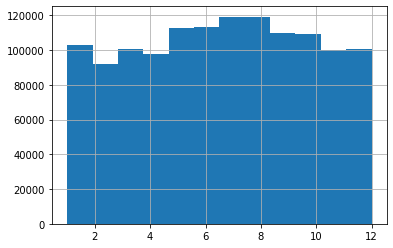

In [13]:
crimes_date["Month"].hist(bins=12)

<AxesSubplot:>

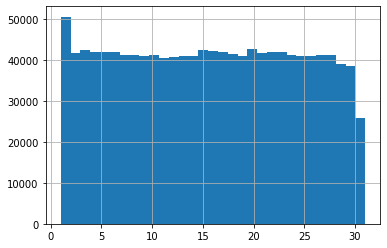

In [14]:
crimes_date["Day"].hist(bins=31)

<AxesSubplot:>

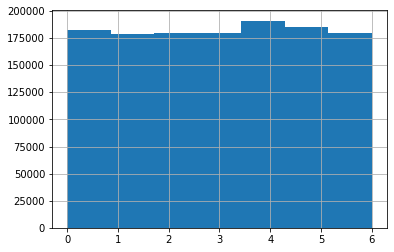

In [15]:
crimes_date["WeekDay"].hist(bins=7)

<AxesSubplot:>

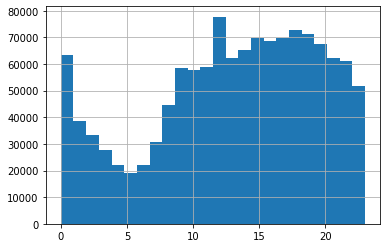

In [16]:
crimes_date["Hour"].hist(bins=24)

We can see that most crimes are reportedduring the day, which may indicate as well that they predominantly happen or are noticed during the day.

### Plotting a line graph with the variation of crimes per year 

In [17]:
crimes_date.groupby(by=["Year","Month"]).count()

Primary Type   Date    Day  WeekDay   Hour  Minutes  Year-Month  \
Year Month                                                                    
2016 1             20714  20714  20714    20714  20714    20714       20714   
     2             18736  18736  18736    18736  18736    18736       18736   
     3             22042  22042  22042    22042  22042    22042       22042   
     4             21153  21153  21153    21153  21153    21153       21153   
     5             23531  23531  23531    23531  23531    23531       23531   
     6             24057  24057  24057    24057  24057    24057       24057   
     7             24844  24844  24844    24844  24844    24844       24844   
     8             24904  24904  24904    24904  24904    24904       24904   
     9             23681  23681  23681    23681  23681    23681       23681   
     10            23743  23743  23743    23743  23743    23743       23743   
     11            21742  21742  21742    21742  21742    21742       21742   
     12            20378  20378  20378    20378  20378    20378       20378   
2017 1             22113  22113  22113    22113  22113    22113       22113   
     2             19296  19296  19296    19296  19296    19296       19296   
     3             20552  20552  20552    20552  20552    20552       20552   
     4             21680  21680  21680    21680  21680    21680       21680   
     5             23365  23365  23365    23365  23365    23365       23365   
     6             23846  23846  23846    23846  23846    23846       23846   
     7             24853  24853  24853    24853  24853    24853       24853   
     8             24727  24727  24727    24727  24727    24727       24727   
     9             22837  22837  22837    22837  22837    22837       22837   
     10            22908  22908  22908    22908  22908    22908       22908   
     11            21480  21480  21480    21480  21480    21480       21480   
     12            21088  21088  21088    21088  21088    21088       21088   
2018 1             20476  20476  20476    20476  20476    20476       20476   
     2             17337  17337  17337    17337  17337    17337       17337   
     3             21213  21213  21213    21213  21213    21213       21213   
     4             21129  21129  21129    21129  21129    21129       21129   
     5             24713  24713  24713    24713  24713    24713       24713   
     6             24215  24215  24215    24215  24215    24215       24215   
     7             25251  25251  25251    25251  25251    25251       25251   
     8             25436  25436  25436    25436  25436    25436       25436   
     9             23093  23093  23093    23093  23093    23093       23093   
     10            22823  22823  22823    22823  22823    22823       22823   
     11            20664  20664  20664    20664  20664    20664       20664   
     12            21971  21971  21971    21971  21971    21971       21971   
2019 1             19641  19641  19641    19641  19641    19641       19641   
     2             18397  18397  18397    18397  18397    18397       18397   
     3             20410  20410  20410    20410  20410    20410       20410   
     4             20999  20999  20999    20999  20999    20999       20999   
     5             23633  23633  23633    23633  23633    23633       23633   
     6             23584  23584  23584    23584  23584    23584       23584   
     7             24830  24830  24830    24830  24830    24830       24830   
     8             24366  24366  24366    24366  24366    24366       24366   
     9             22404  22404  22404    22404  22404    22404       22404   
     10            21649  21649  21649    21649  21649    21649       21649   
     11            19900  19900  19900    19900  19900    19900       19900   
     12            20754  20754  20754    20754  20754    20754       20754   
2020 1             19767  19767  19767    19767  19767    1976

In [18]:
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
ID,,,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1,2018-09,2018-09-01
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25,2016-05,2016-05-01
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30,2020-03,2020-03-17
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0,2018-01,2018-01-01
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0,2019-09,2019-09-24
...,...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0,2020-12,2020-12-15
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0,2017-02,2017-02-23
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0,2019-03,2019-03-02


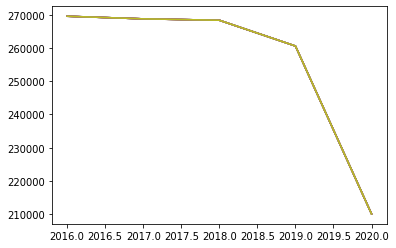

In [19]:
# Plotting the number of crimes per year
plt.plot(crimes_date.groupby("Year").count())

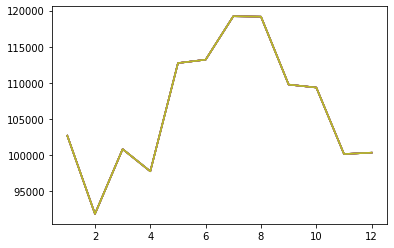

In [20]:
# Plotting the number of crimes per year (aggregating years)
plt.plot(crimes_date.groupby("Month").count())

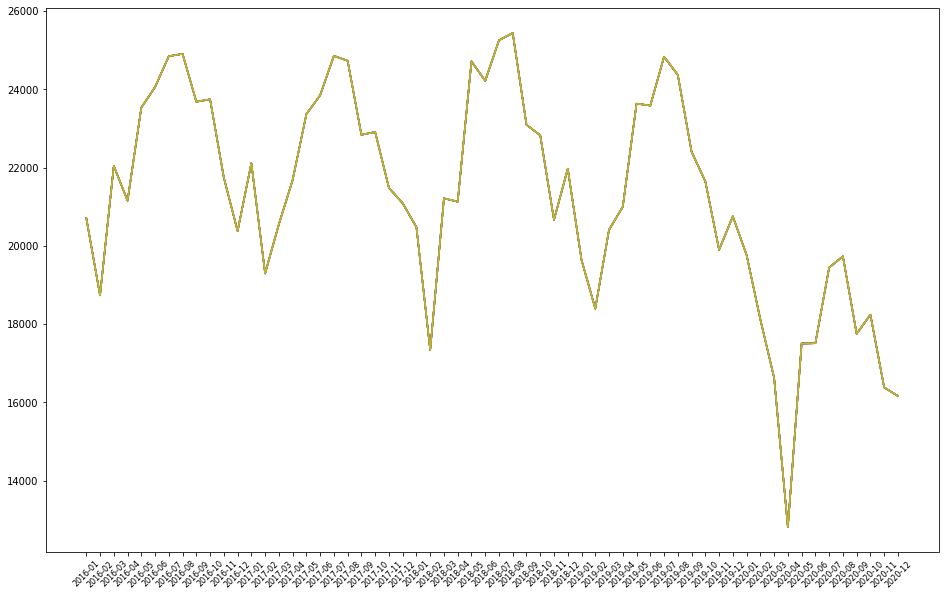

In [21]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=45,size=8)
plt.plot(crimes_date.groupby("Year-Month").count())

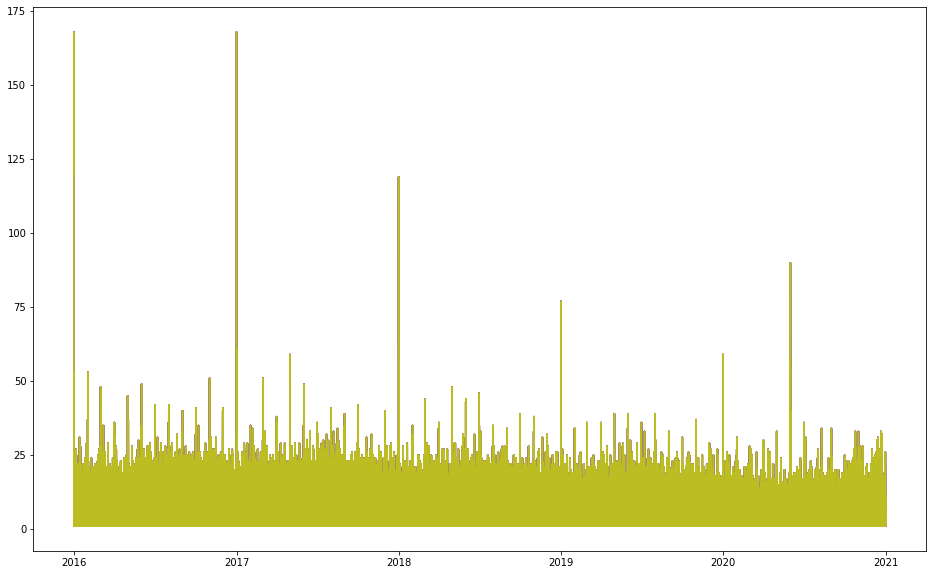

In [22]:
# Plotting the crimes per date (but approximated to each minute)

fig = plt.figure(figsize=(16,10))
plt.plot(crimes_date.groupby("Date").count())

<ipython-input-23-ec21a8911ef3>:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=20, rotation =45)


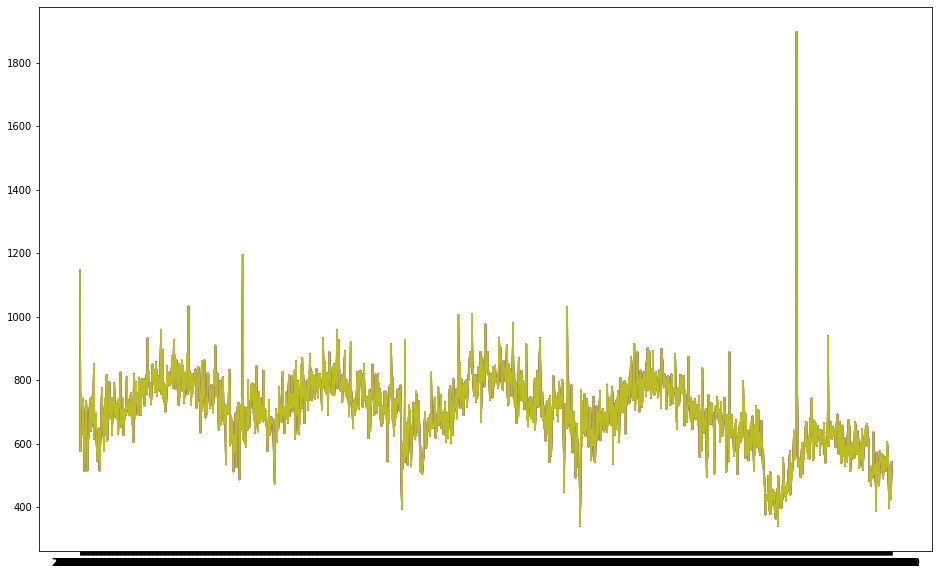

In [23]:
# Getting the aggregate of crimes per day
fig = plt.figure(figsize=(16,10))
plt.plot(crimes_date.groupby("Year-Month-Day").count())
plt.locator_params(axis='x', nbins=20, rotation =45)

In [24]:
crimes_date.groupby("Year-Month-Day").count().sort_values("Date", ascending=False)

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month
Year-Month-Day,,,,,,,,,
2020-05-31,1897,1897,1897,1897,1897,1897,1897,1897,1897
2017-01-01,1195,1195,1195,1195,1195,1195,1195,1195,1195
2016-01-01,1147,1147,1147,1147,1147,1147,1147,1147,1147
2016-09-01,1032,1032,1032,1032,1032,1032,1032,1032,1032
2019-01-01,1031,1031,1031,1031,1031,1031,1031,1031,1031
...,...,...,...,...,...,...,...,...,...
2020-04-02,377,377,377,377,377,377,377,377,377
2020-03-22,376,376,376,376,376,376,376,376,376
2020-04-14,363,363,363,363,363,363,363,363,363


As we can see, the most number of crimes reported in a single day were related to the day of the protests for **George Floyd** and **#BlackLivesMatter**, on **31st May 2020**.

Next on line, the days that have the most number of crimes is the New Year (January 1st).

In [25]:
terrible_days = crimes_date.groupby("Date").count()
terrible_days

,Primary Type,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
Date,,,,,,,,,
2016-01-01 00:00:00,120,120,120,120,120,120,120,120,120
2016-01-01 00:01:00,168,168,168,168,168,168,168,168,168
2016-01-01 00:02:00,3,3,3,3,3,3,3,3,3
2016-01-01 00:04:00,1,1,1,1,1,1,1,1,1
2016-01-01 00:05:00,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:38:00,1,1,1,1,1,1,1,1,1
2020-12-31 23:40:00,1,1,1,1,1,1,1,1,1
2020-12-31 23:45:00,6,6,6,6,6,6,6,6,6


In [26]:
terrible_days.sort_values("Primary Type", ascending=False).head(10)

,Primary Type,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
Date,,,,,,,,,
2016-01-01 00:01:00,168,168,168,168,168,168,168,168,168
2017-01-01 00:01:00,168,168,168,168,168,168,168,168,168
2017-01-01 00:00:00,131,131,131,131,131,131,131,131,131
2016-01-01 00:00:00,120,120,120,120,120,120,120,120,120
2018-01-01 00:01:00,119,119,119,119,119,119,119,119,119
2018-01-01 00:00:00,99,99,99,99,99,99,99,99,99
2020-05-31 16:00:00,90,90,90,90,90,90,90,90,90
2020-05-31 15:00:00,79,79,79,79,79,79,79,79,79
2019-01-01 00:00:00,77,77,77,77,77,77,77,77,77


In [27]:
crimes_date.groupby(by=["Year", "Month"]).count()

Primary Type   Date    Day  WeekDay   Hour  Minutes  Year-Month  \
Year Month                                                                    
2016 1             20714  20714  20714    20714  20714    20714       20714   
     2             18736  18736  18736    18736  18736    18736       18736   
     3             22042  22042  22042    22042  22042    22042       22042   
     4             21153  21153  21153    21153  21153    21153       21153   
     5             23531  23531  23531    23531  23531    23531       23531   
     6             24057  24057  24057    24057  24057    24057       24057   
     7             24844  24844  24844    24844  24844    24844       24844   
     8             24904  24904  24904    24904  24904    24904       24904   
     9             23681  23681  23681    23681  23681    23681       23681   
     10            23743  23743  23743    23743  23743    23743       23743   
     11            21742  21742  21742    21742  21742    21742       21742   
     12            20378  20378  20378    20378  20378    20378       20378   
2017 1             22113  22113  22113    22113  22113    22113       22113   
     2             19296  19296  19296    19296  19296    19296       19296   
     3             20552  20552  20552    20552  20552    20552       20552   
     4             21680  21680  21680    21680  21680    21680       21680   
     5             23365  23365  23365    23365  23365    23365       23365   
     6             23846  23846  23846    23846  23846    23846       23846   
     7             24853  24853  24853    24853  24853    24853       24853   
     8             24727  24727  24727    24727  24727    24727       24727   
     9             22837  22837  22837    22837  22837    22837       22837   
     10            22908  22908  22908    22908  22908    22908       22908   
     11            21480  21480  21480    21480  21480    21480       21480   
     12            21088  21088  21088    21088  21088    21088       21088   
2018 1             20476  20476  20476    20476  20476    20476       20476   
     2             17337  17337  17337    17337  17337    17337       17337   
     3             21213  21213  21213    21213  21213    21213       21213   
     4             21129  21129  21129    21129  21129    21129       21129   
     5             24713  24713  24713    24713  24713    24713       24713   
     6             24215  24215  24215    24215  24215    24215       24215   
     7             25251  25251  25251    25251  25251    25251       25251   
     8             25436  25436  25436    25436  25436    25436       25436   
     9             23093  23093  23093    23093  23093    23093       23093   
     10            22823  22823  22823    22823  22823    22823       22823   
     11            20664  20664  20664    20664  20664    20664       20664   
     12            21971  21971  21971    21971  21971    21971       21971   
2019 1             19641  19641  19641    19641  19641    19641       19641   
     2             18397  18397  18397    18397  18397    18397       18397   
     3             20410  20410  20410    20410  20410    20410       20410   
     4             20999  20999  20999    20999  20999    20999       20999   
     5             23633  23633  23633    23633  23633    23633       23633   
     6             23584  23584  23584    23584  23584    23584       23584   
     7             24830  24830  24830    24830  24830    24830       24830   
     8             24366  24366  24366    24366  24366    24366       24366   
     9             22404  22404  22404    22404  22404    22404       22404   
     10            21649  21649  21649    21649  21649    21649       21649   
     11            19900  19900  19900    19900  19900    19900       19900   
     12            20754  20754  20754    20754  20754    20754       20754   
2020 1             19767  19767  19767    19767  19767    1976

#### Simplifying 

In [28]:
aggregated_crimes = pd.pivot_table(crimes_date[["Year-Month-Day", "Primary Type", "Date"]], index=crimes_date[["Year-Month-Day", "Primary Type"]], aggfunc="count")
aggregated_crimes.reset_index(inplace=True)
aggregated_crimes.rename(columns={"Date":"Number_of_Crimes"}, inplace=True)
aggregated_crimes.head(10)

,Year-Month-Day,Primary Type,Number_of_Crimes
0,2016-01-01,ARSON,1
1,2016-01-01,ASSAULT,43
2,2016-01-01,BATTERY,229
3,2016-01-01,BURGLARY,14
4,2016-01-01,CRIMINAL DAMAGE,113
5,2016-01-01,CRIMINAL SEXUAL ASSAULT,40
6,2016-01-01,CRIMINAL TRESPASS,8
7,2016-01-01,DECEPTIVE PRACTICE,227
8,2016-01-01,HOMICIDE,3
9,2016-01-01,INTERFERENCE WITH PUBLIC OFFICER,2


## Another dataset about protests in the USA

In [30]:
protests_usa = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/protests_usa.csv")
protests_usa.head()

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1


In [31]:
protests_chicago = protests_usa[protests_usa.Location.str.contains("Chicago")].copy()
protests_chicago.reset_index(drop=True, inplace=True)
protests_chicago.head(20)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-21,"Chicago, IL",250000.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.nbcchicago.com/news/local/womens-ma...,4
1,2017-01-28,"O'Hare Airport, Chicago, IL",1000.0,Immigration (Airport),Immigration; Against travel ban,Yes,http://www.nbcchicago.com/news/local/chicago-o...,1
2,2017-02-02,"Department of Homeland Security, Chicago, IL",200.0,Immigration,Immigration; Against travel ban,Yes,http://chicago.cbslocal.com/2017/02/02/hundred...,1
3,2017-02-12,"Trump Tower, Chicago, IL",100.0,Executive,Executive; Against 45th president,Yes,http://wsvn.com/news/politics/hundreds-gather-...,1
4,2017-02-16,"Union Park, Chicago, IL",4000.0,Immigration (Day Without Immigrants),Immigration; For compassionate immigration; Da...,Yes,http://www.fightbacknews.org/2017/2/16/4000-pl...,1
5,2017-02-19,"Chicago, IL",1000.0,Executive,Executive; Against 45th president,Yes,http://wgntv.com/2017/02/19/anti-trump-protest...,2
6,2017-02-20,"Chicago, IL",1000.0,Executive (Not My President's Day),Executive; Against 45th president,Yes,http://www.chicagotribune.com/news/nationworld...,1
7,2017-02-23,"Chicago, IL",50.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1
8,2017-02-23,"Chicago, IL",150.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1
9,2017-03-03,"Chicago, IL",1000.0,Civil Rights (Transgender Rights),Civil Rights; Pro-LGBTQ; For transgender rights,Yes,http://www.chicagotribune.com/news/local/break...,1


In [32]:
protests_chicago["Event (legacy; see tags)"].nunique()

85

In [33]:
protests_chicago["Event (legacy; see tags)"].value_counts()

Racial Injustice                  93
Other                             38
Collective Bargaining             36
Executive                         24
Education                         17
                                  ..
Civil Rights (LGBTQ)               1
Other (Soda Tax)                   1
Other (Anti-Drugs)                 1
Environment (EPA, clean water)     1
Healthcare (CHIP)                  1
Name: Event (legacy; see tags), Length: 85, dtype: int64

In [34]:
protests_chicago["Event type"] = protests_chicago["Event (legacy; see tags)"].str.split('(',expand=True)[0].str.strip()

In [35]:
protests_chicago["Event type"].unique()

array(['Civil Rights', 'Immigration', 'Executive', 'Legislative',
       'Racial Injustice', 'Education', 'Healthcare', 'Other', 'Guns',
       'Environment', 'Collective Bargaining', 'International Relations',
       'Judicial'], dtype=object)

In [36]:
protests_chicago.shape

(401, 9)

In [37]:
protests_chicago.head(10)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,Event type
0,2017-01-21,"Chicago, IL",250000.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.nbcchicago.com/news/local/womens-ma...,4,Civil Rights
1,2017-01-28,"O'Hare Airport, Chicago, IL",1000.0,Immigration (Airport),Immigration; Against travel ban,Yes,http://www.nbcchicago.com/news/local/chicago-o...,1,Immigration
2,2017-02-02,"Department of Homeland Security, Chicago, IL",200.0,Immigration,Immigration; Against travel ban,Yes,http://chicago.cbslocal.com/2017/02/02/hundred...,1,Immigration
3,2017-02-12,"Trump Tower, Chicago, IL",100.0,Executive,Executive; Against 45th president,Yes,http://wsvn.com/news/politics/hundreds-gather-...,1,Executive
4,2017-02-16,"Union Park, Chicago, IL",4000.0,Immigration (Day Without Immigrants),Immigration; For compassionate immigration; Da...,Yes,http://www.fightbacknews.org/2017/2/16/4000-pl...,1,Immigration
5,2017-02-19,"Chicago, IL",1000.0,Executive,Executive; Against 45th president,Yes,http://wgntv.com/2017/02/19/anti-trump-protest...,2,Executive
6,2017-02-20,"Chicago, IL",1000.0,Executive (Not My President's Day),Executive; Against 45th president,Yes,http://www.chicagotribune.com/news/nationworld...,1,Executive
7,2017-02-23,"Chicago, IL",50.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1,Legislative
8,2017-02-23,"Chicago, IL",150.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1,Legislative
9,2017-03-03,"Chicago, IL",1000.0,Civil Rights (Transgender Rights),Civil Rights; Pro-LGBTQ; For transgender rights,Yes,http://www.chicagotribune.com/news/local/break...,1,Civil Rights


In [77]:
protests_chicago.sort_values("Attendees",ascending=False)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,Event type
67,2018-01-20,"Chicago, IL",300000.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,https://chicago.suntimes.com/chicago-politics/...,43,Civil Rights
0,2017-01-21,"Chicago, IL",250000.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.nbcchicago.com/news/local/womens-ma...,4,Civil Rights
110,2018-06-30,"Daley Plaza, Chicago, IL",50000.0,Immigration (Families Belong Together),Immigration; For compassionate immigration; Fa...,Yes,https://chicago.cbslocal.com/2018/06/30/901462...,40,Immigration
24,2017-04-22,"Chicago, IL",40000.0,Other (March for Science),Other; For science; March for Science,Yes,http://www.chicagotribune.com/news/local/break...,2,Other
83,2018-03-24,"Union Park, Chicago, IL",30000.0,Guns (March for Our Lives),Guns; For greater gun control; March for Our L...,Yes,https://chicago.suntimes.com/chicago-politics/...,57,Guns
...,...,...,...,...,...,...,...,...,...
390,2021-01-11,"Suder Elementary, Chicago, IL",NaN,Education,Education; Against hazardous conditions; Coron...,Yes,https://chicago.suntimes.com/education/2021/1/...,1,Education
393,2021-01-18,"Chicago, IL",NaN,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.chicagotribune.com/politics/ct-anj...,1,Racial Injustice
395,2021-01-18,"Federal Plaza, Chicago, IL",NaN,Racial Injustice,Civil Rights; Executive; Against 45th presiden...,Yes,http://www.fightbacknews.org/2021/1/18/chicago...,1,Racial Injustice
397,2021-01-21,"DeWitt Clinton Elementary School, Chicago, IL",NaN,Education,Education; Against hazardous conditions; Coron...,Yes,https://chicago.suntimes.com/education/2021/1/...,1,Education


In [38]:
protests_chicago.isna().sum()

Date                          0
Location                      0
Attendees                   160
Event (legacy; see tags)      0
Tags                          0
Curated                       0
Source                        0
Total Articles                0
Event type                    0
dtype: int64

In [39]:
protests_chicago.nunique()

Date                        305
Location                     88
Attendees                    41
Event (legacy; see tags)     85
Tags                        169
Curated                       2
Source                      368
Total Articles               26
Event type                   13
dtype: int64

In [40]:
protests_chicago.dtypes

Date                         object
Location                     object
Attendees                   float64
Event (legacy; see tags)     object
Tags                         object
Curated                      object
Source                       object
Total Articles                int64
Event type                   object
dtype: object

In [41]:
protests_chicago.Date.describe()

count            401
unique           305
top       2020-07-24
freq               6
Name: Date, dtype: object

## Joining the 2 Dataframes:

In [42]:
crimes_events = pd.merge(aggregated_crimes, protests_chicago[["Date","Event type", "Attendees"]],
                  how="left", left_on="Year-Month-Day", right_on="Date")
crimes_events.drop(columns="Date",inplace=True)
crimes_events.shape

(40418, 5)

In [43]:
crimes_events.head()

,Year-Month-Day,Primary Type,Number_of_Crimes,Event type,Attendees
0,2016-01-01,ARSON,1,NaN,NaN
1,2016-01-01,ASSAULT,43,NaN,NaN
2,2016-01-01,BATTERY,229,NaN,NaN
3,2016-01-01,BURGLARY,14,NaN,NaN
4,2016-01-01,CRIMINAL DAMAGE,113,NaN,NaN


In [44]:
crimes_events.isna().sum()

Year-Month-Day          0
Primary Type            0
Number_of_Crimes        0
Event type          32313
Attendees           35506
dtype: int64

In [45]:
crimes_events["Year"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).year
crimes_events["Month"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).month
crimes_events["Day"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).day
crimes_events["WeekDay"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).dayofweek
crimes_events

,Year-Month-Day,Primary Type,Number_of_Crimes,Event type,Attendees,Year,Month,Day,WeekDay
0,2016-01-01,ARSON,1,NaN,NaN,2016,1,1,4
1,2016-01-01,ASSAULT,43,NaN,NaN,2016,1,1,4
2,2016-01-01,BATTERY,229,NaN,NaN,2016,1,1,4
3,2016-01-01,BURGLARY,14,NaN,NaN,2016,1,1,4
4,2016-01-01,CRIMINAL DAMAGE,113,NaN,NaN,2016,1,1,4
...,...,...,...,...,...,...,...,...,...
40413,2020-12-31,ROBBERY,12,NaN,NaN,2020,12,31,3
40414,2020-12-31,SEX OFFENSE,2,NaN,NaN,2020,12,31,3
40415,2020-12-31,STALKING,1,NaN,NaN,2020,12,31,3
40416,2020-12-31,THEFT,71,NaN,NaN,2020,12,31,3


In [46]:
# Let's drop 2016 because we don't have protest information for 2016
crimes_events = crimes_events[crimes_events.Year!=2016].copy()
crimes_events

,Year-Month-Day,Primary Type,Number_of_Crimes,Event type,Attendees,Year,Month,Day,WeekDay
7793,2017-01-01,ASSAULT,46,NaN,NaN,2017,1,1,6
7794,2017-01-01,BATTERY,207,NaN,NaN,2017,1,1,6
7795,2017-01-01,BURGLARY,23,NaN,NaN,2017,1,1,6
7796,2017-01-01,CRIMINAL DAMAGE,115,NaN,NaN,2017,1,1,6
7797,2017-01-01,CRIMINAL SEXUAL ASSAULT,46,NaN,NaN,2017,1,1,6
...,...,...,...,...,...,...,...,...,...
40413,2020-12-31,ROBBERY,12,NaN,NaN,2020,12,31,3
40414,2020-12-31,SEX OFFENSE,2,NaN,NaN,2020,12,31,3
40415,2020-12-31,STALKING,1,NaN,NaN,2020,12,31,3
40416,2020-12-31,THEFT,71,NaN,NaN,2020,12,31,3


In [47]:
crimes_events.isna().sum()

Year-Month-Day          0
Primary Type            0
Number_of_Crimes        0
Event type          24520
Attendees           27713
Year                    0
Month                   0
Day                     0
WeekDay                 0
dtype: int64

In [48]:
crimes_events.columns

Index(['Year-Month-Day', 'Primary Type', 'Number_of_Crimes', 'Event type',
       'Attendees', 'Year', 'Month', 'Day', 'WeekDay'],
      dtype='object')

In [49]:
crimes_events.reset_index(inplace=True)

# Droping index column created before
crimes_events.drop(columns='index', inplace=True)

In [50]:
# Cleaning this new dataframe

    ## Filling missing values
crimes_events["Event type"].fillna("-",inplace=True)
crimes_events.Attendees.fillna(0,inplace=True)

    ## Renaming columns
crimes_events.rename(columns={"Event type":"Protest_Type", "Attendees":"Protest_Atendees",
                             'Primary Type': 'Primary_Type'}, inplace=True)

    ## Reorganizing columns
crimes_events = crimes_events[['Year-Month-Day', 'Year', 'Month', 'Day', 'WeekDay', 'Primary_Type',
                               'Number_of_Crimes', 'Protest_Type', 'Protest_Atendees']]
    ## Resetting index
crimes_events.reset_index(inplace=True)

    ## Droping index column created before
crimes_events.drop(columns='index', inplace=True)

In [51]:
crimes_events.isna().sum()

Year-Month-Day      0
Year                0
Month               0
Day                 0
WeekDay             0
Primary_Type        0
Number_of_Crimes    0
Protest_Type        0
Protest_Atendees    0
dtype: int64

In [52]:
crimes_events

,Year-Month-Day,Year,Month,Day,WeekDay,Primary_Type,Number_of_Crimes,Protest_Type,Protest_Atendees
0,2017-01-01,2017,1,1,6,ASSAULT,46,-,0.0
1,2017-01-01,2017,1,1,6,BATTERY,207,-,0.0
2,2017-01-01,2017,1,1,6,BURGLARY,23,-,0.0
3,2017-01-01,2017,1,1,6,CRIMINAL DAMAGE,115,-,0.0
4,2017-01-01,2017,1,1,6,CRIMINAL SEXUAL ASSAULT,46,-,0.0
...,...,...,...,...,...,...,...,...,...
32620,2020-12-31,2020,12,31,3,ROBBERY,12,-,0.0
32621,2020-12-31,2020,12,31,3,SEX OFFENSE,2,-,0.0
32622,2020-12-31,2020,12,31,3,STALKING,1,-,0.0
32623,2020-12-31,2020,12,31,3,THEFT,71,-,0.0


<AxesSubplot:>

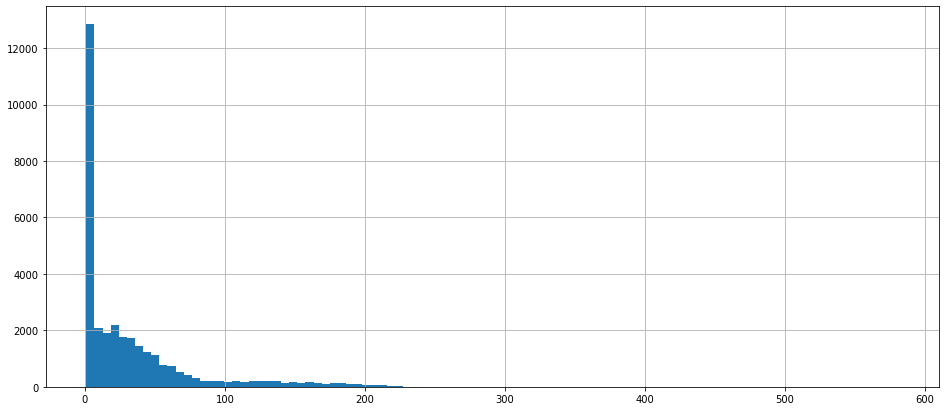

In [53]:
plt.figure(figsize=(16,7))
crimes_events.Number_of_Crimes.hist(bins=100)

## Regression Analysis

Step 0: checking the correlations to the variable we want to predict (number of crimes per date).

In [54]:
crimes_events.corr().Number_of_Crimes

Year               -0.046945
Month               0.005761
Day                -0.004899
WeekDay             0.000713
Number_of_Crimes    1.000000
Protest_Atendees    0.000602
Name: Number_of_Crimes, dtype: float64

In [55]:
crimes_events.columns

Index(['Year-Month-Day', 'Year', 'Month', 'Day', 'WeekDay', 'Primary_Type',
       'Number_of_Crimes', 'Protest_Type', 'Protest_Atendees'],
      dtype='object')

### Model construction $I$

In [56]:
from statsmodels.formula.api import ols

In [57]:
model = ols('Number_of_Crimes ~ Year + Month + Day + WeekDay + Protest_Atendees', data=crimes_events)

In [58]:
model_fit=model.fit()

In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number_of_Crimes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     14.86
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.34e-14
Time:                        10:03:02   Log-Likelihood:            -1.6974e+05
No. Observations:               32625   AIC:                         3.395e+05
Df Residuals:                   32619   BIC:                         3.396e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3772.4981    439.594      8.582      0.000    2910.878    4634.118
Year                -1.8528      0.218     -8.508      0.000      -2.280      -1.426
Month                0.0812      0.073      1.119      0.263      -0.061       0.223
Day                 -0.0265      0.028     -0.956      0.339      -0.081       0.028
WeekDay              0.0370      0.123      0.301      0.763      -0.204       0.278
Protest_Atendees -2.431e-06   2.33e-05     -0.104      0.917   -4.81e-05    4.33e-05
==============================================================================
Omnibus:                    14513.287   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70756.458
Skew:                           2.169   Prob(JB):                         0.00
Kurtosis:                       8.764   Cond. No.                     1.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Optimizations

In [60]:
model=ols('Number_of_Crimes ~ Year + Month + Day + WeekDay + Primary_Type + Protest_Type + Protest_Atendees',
          data=crimes_events)

In [61]:
# Calculating model
model_fit=model.fit()

In [62]:
# Checking the results
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number_of_Crimes   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     5757.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:03:06   Log-Likelihood:            -1.3279e+05
No. Observations:               32625   AIC:                         2.657e+05
Df Residuals:                   32575   BIC:                         2.661e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          4984.0854    147.945     33.689      0.000    4694.108    5274.062
Primary_Type[T.ASSAULT]                              51.9668      0.569     91.340      0.000      50.852      53.082
Primary_Type[T.BATTERY]                             128.4684      0.569    225.804      0.000     127.353     129.584
Primary_Type[T.BURGLARY]                             27.7137      0.569     48.711      0.000      26.599      28.829
Primary_Type[T.CONCEALED CARRY LICENSE VIOLATION]    -0.1283      0.771     -0.166      0.868      -1.640       1.384
Primary_Type[T.CRIMINAL DAMAGE]                      72.3654      0.569    127.194      0.000      71.250      73.481
Primary_Type[T.CRIMINAL SEXUAL ASSAULT]               2.3237      0.572      4.066      0.000       1.203       3.444
Primary_Type[T.CRIMINAL TRESPASS]                    14.8277      0.569     26.062      0.000      13.713      15.943
Primary_Type[T.DECEPTIVE PRACTICE]                   48.9133      0.569     85.973      0.000      47.798      50.028
Primary_Type[T.GAMBLING]                             -1.7784      0.825     -2.156      0.031      -3.395      -0.162
Primary_Type[T.HOMICIDE]                              0.3825      0.600      0.637      0.524      -0.794       1.559
Primary_Type[T.HUMAN TRAFFICKING]                    -1.3315      2.286     -0.583      0.560      -5.811       3.148
Primary_Type[T.INTERFERENCE WITH PUBLIC OFFICER]      1.3087      0.580      2.256      0.024       0.172       2.446
Primary_Type[T.INTIMIDATION]                         -0.4507      0.752     -0.599      0.549      -1.925       1.024
Primary_Type[T.KIDNAPPING]                           -0.9002      0.758     -1.187      0.235      -2.386       0.586
Primary_Type[T.LIQUOR LAW VIOLATION]                 -0.8249      0.735     -1.123      0.262      -2.265       0.615
Primary_Type[T.MOTOR VEHICLE THEFT]                  25.8142      0.569     45.373      0.000      24.699      26.929
Primary_Type[T.NARCOTICS]                            30.2095      0.569     53.098      0.000      29.094      31.325
Primary_Type[T.NON-CRIMINAL]                         -3.1956      1.620     -1.973      0.049      -6.371      -0.021
Primary_Type[T.OBSCENITY]                            -1.3395      0.984     -1.361      0.173      -3.268       0.589
Primary_Type[T.OFFENSE INVOLVING CHILDREN]            4.1648      0.570      7.309      0.000       3.048       5.282
Primary_Type[T.OTHER NARCOTIC VIOLATION]             -1.3712      2.870     -0.478      0.633      -6.997       4.255
Primary_Type[T.OTHER OFFENSE]                        41.4826      0.569     72.912      0.000      40.367      42.598
Primary_Type[T.

## Another Try

In [67]:
test = crimes_events.groupby("Year-Month-Day")["Number_of_Crimes","Protest_Atendees"].sum()

<ipython-input-67-c3cb214cdd81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = crimes_events.groupby("Year-Month-Day")["Number_of_Crimes","Protest_Atendees"].sum()


In [71]:
test.sort_values("Protest_Atendees",ascending=False)

,Number_of_Crimes,Protest_Atendees
Year-Month-Day,,
2018-01-20,729,7200000.0
2017-01-21,786,5250000.0
2018-06-30,867,1200000.0
2017-04-22,701,880000.0
2018-03-24,1947,601600.0
...,...,...
2018-05-27,882,0.0
2018-05-26,853,0.0
2018-05-25,804,0.0


<AxesSubplot:xlabel='Protest_Atendees', ylabel='Number_of_Crimes'>

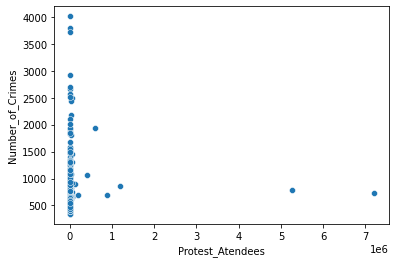

In [68]:
sns.scatterplot(x="Protest_Atendees", y="Number_of_Crimes",data=test)

In [ ]:
test = crimes_events[]

model=ols('Number_of_Crimes ~ Year + Month + Day + WeekDay + Protest_Type + Protest_Atendees',
          data=test)
model_fit=model.fit()
model_fit.summary()

## Regression Analysis without categorical variables "Primary_Type" and "Protest_Type"

In [129]:
aggregated_crimes2 = pd.pivot_table(crimes_date[["Year-Month-Day", "Date"]], index=crimes_date[["Year-Month-Day"]], aggfunc="count")
aggregated_crimes2.reset_index(inplace=True)
aggregated_crimes2.rename(columns={"Date":"Number_of_Crimes"}, inplace=True)
aggregated_crimes2["Year"] = pd.DatetimeIndex(aggregated_crimes2["Year-Month-Day"]).year
aggregated_crimes2["Month"] = pd.DatetimeIndex(aggregated_crimes2["Year-Month-Day"]).month
aggregated_crimes2["Day"] = pd.DatetimeIndex(aggregated_crimes2["Year-Month-Day"]).day
aggregated_crimes2["WeekDay"] = pd.DatetimeIndex(aggregated_crimes2["Year-Month-Day"]).dayofweek

aggregated_crimes2.head(10)

,Year-Month-Day,Number_of_Crimes,Year,Month,Day,WeekDay
0,2016-01-01,1147,2016,1,1,4
1,2016-01-02,576,2016,1,2,5
2,2016-01-03,618,2016,1,3,6
3,2016-01-04,626,2016,1,4,0
4,2016-01-05,627,2016,1,5,1
5,2016-01-06,626,2016,1,6,2
6,2016-01-07,706,2016,1,7,3
7,2016-01-08,742,2016,1,8,4
8,2016-01-09,649,2016,1,9,5
9,2016-01-10,597,2016,1,10,6


In [130]:
aggregated_protests = protests_chicago[["Date","Attendees"]].groupby("Date").sum()
aggregated_protests.rename(columns={"Attendees":"Protests_Attendees"},inplace=True)
aggregated_protests

,Protests_Attendees
Date,
2017-01-21,250000.0
2017-01-28,1000.0
2017-02-02,200.0
2017-02-12,100.0
2017-02-16,4000.0
...,...
2021-01-18,150.0
2021-01-19,20.0
2021-01-21,0.0


In [204]:
# Merging the 2 DataFrames
crimes_events2 = pd.merge(aggregated_crimes2, aggregated_protests,
                  how="left", left_on="Year-Month-Day", right_on="Date")
#crimes_events2.drop(columns="Date",inplace=True)

# Cleaning the NaN values in Protests_Attendees columns
crimes_events2.Protests_Attendees.fillna(0,inplace=True)

crimes_events2 = crimes_events2[crimes_events2.Year>=2017].copy()

print(crimes_events2.shape)
crimes_events2

(1461, 7)


,Year-Month-Day,Number_of_Crimes,Year,Month,Day,WeekDay,Protests_Attendees
366,2017-01-01,1195,2017,1,1,6,0.0
367,2017-01-02,613,2017,1,2,0,0.0
368,2017-01-03,717,2017,1,3,1,0.0
369,2017-01-04,612,2017,1,4,2,0.0
370,2017-01-05,610,2017,1,5,3,0.0
...,...,...,...,...,...,...,...
1822,2020-12-27,491,2020,12,27,6,150.0
1823,2020-12-28,521,2020,12,28,0,0.0
1824,2020-12-29,424,2020,12,29,1,0.0
1825,2020-12-30,466,2020,12,30,2,0.0


In [185]:
# Creating dummies for type of crimes commited in one day
crimes_events.groupby('Year-Month-Day').Primary_Type.agg('unique').map(lambda x: ','.join(x)).str.get_dummies(',')

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year-Month-Day,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,1,1,0,1,1
2017-01-02,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,1,1,1,1,1
2017-01-03,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,1,1,1,1
2017-01-04,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,0,1,0,0,1,1
2017-01-05,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,1,0,1,1
2020-12-28,0,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,1,1,1,1,1
2020-12-29,0,1,1,1,0,1,1,1,1,0,...,1,0,0,0,0,1,1,1,1,1


In [ ]:
# Creating dummies for type of crimes commited in one day
crimes_events.groupby('Year-Month-Day').Primary_Type.agg('unique').map(lambda x: ','.join(x)).str.get_dummies(',')

In [135]:
# Creating dummies for the categorical variables
crimes_events2=pd.get_dummies(data=crimes_events2, columns=['Year','Month',"WeekDay"], drop_first=True)

In [136]:
print(len(crimes_events2.columns))
crimes_events2.columns

25


Index(['Year-Month-Day', 'Number_of_Crimes', 'Day', 'Protests_Attendees',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'WeekDay_1', 'WeekDay_2',
       'WeekDay_3', 'WeekDay_4', 'WeekDay_5', 'WeekDay_6'],
      dtype='object')

In [137]:
crimes_events2.head()

,Year-Month-Day,Number_of_Crimes,Day,Protests_Attendees,Year_2017,Year_2018,Year_2019,Year_2020,Month_2,Month_3,...,Month_9,Month_10,Month_11,Month_12,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6
0,2016-01-01,1147,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2016-01-02,576,2,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2016-01-03,618,3,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2016-01-04,626,4,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,627,5,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [180]:
X.head()

,const,Protests_Attendees,Year_2017,Year_2018,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,...,Month_11,Month_12,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6,ypred,trend
0,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,732.809618,0
1,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,711.603535,1
2,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,688.838541,2
3,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,699.574110,3
4,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,686.449048,4


In [179]:
from statsmodels.api import OLS
from statsmodels.api import add_constant

# Specifying features and targets
X, y = add_constant(crimes_events2).drop(['Number_of_Crimes',"Year-Month-Day","Day"], axis=1), crimes_events2.Number_of_Crimes # features, target

X['trend']=X.index
# Construction of model
model_fit=OLS(y, X.drop('ypred', axis=1)).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number_of_Crimes   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     91.71
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          7.42e-283
Time:                        12:27:06   Log-Likelihood:                -10478.
No. Observations:                1827   AIC:                         2.100e+04
Df Residuals:                    1803   BIC:                         2.114e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                713.7942      8.819     80.940      0.000     696.498     731.090
Protests_Attendees     0.0002      0.000      0.910      0.363      -0.000       0.001
Year_2017            335.6253     73.468      4.568      0.000     191.533     479.717
Year_2018            670.1597    146.597      4.571      0.000     382.642     957.677
Year_2019            984.8965    219.802      4.481      0.000     553.804    1415.989
Year_2020           1181.7140    293.195      4.030      0.000     606.677    1756.751
Month_2               12.6800     10.626      1.193      0.233      -8.160      33.520
Month_3               42.8319     14.705      2.913      0.004      13.991      71.672
Month_4               72.2202     20.024      3.607      0.000      32.948     111.493
Month_5              176.1293     25.656      6.865      0.000     125.810     226.449
Month_6              231.0070     31.505      7.332      0.000     169.216     292.798
Month_7              273.7789     37.414      7.317      0.000     200.399     347.159
Month_8              302.0079     43.492      6.944      0.000     216.709     387.307
Month_9              292.7440     49.518      5.912      0.000     195.625     389.863
Month_10             295.1074     55.542      5.313      0.000     186.174     404.040
Month_11             285.0210     61.606      4.627      0.000     164.195     405.847
Month_12             292.7529     67.661      4.327      0.000     160.050     425.456
WeekDay_1            -13.0641      6.601     -1.979      0.048     -26.011      -0.118
WeekDay_2            -10.2563      6.601     -1.554      0.120     -23.203       2.690
WeekDay_3            -10.6448      6.601     -1.613      0.107     -23.592       2.302
WeekDay_4             33.1590      6.601      5.023      0.000      20.212      46.106
WeekDay_5             11.9534      6.622      1.805      0.071      -1.034      24.941
WeekDay_6            -10.7961      6.601     -1.636      0.102     -23.743       2.150
trend                 -0.9199      0.201     -4.585      0.000      -1.313      -0.526
==============================================================================
Omnibus:                     1546.307   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           227532.935
Skew:                           3.264   Prob(JB):                         0.00
Kurtosis:                      57.280   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
y_pred=model_fit.predict()
crimes_events2['ypred']=y_pred

In [144]:
crimes_events2.head(10)

,Year-Month-Day,Number_of_Crimes,Day,Protests_Attendees,Year_2017,Year_2018,Year_2019,Year_2020,Month_2,Month_3,...,Month_10,Month_11,Month_12,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6,ypred
0,2016-01-01,1147,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,732.809618
1,2016-01-02,576,2,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,711.603535
2,2016-01-03,618,3,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,688.838541
3,2016-01-04,626,4,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,699.574110
4,2016-01-05,627,5,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,686.449048
5,2016-01-06,626,6,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,689.304666
6,2016-01-07,706,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,688.852512
7,2016-01-08,742,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,732.809618
8,2016-01-09,649,9,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,711.603535
9,2016-01-10,597,10,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,688.838541


(400.0, 900.0)

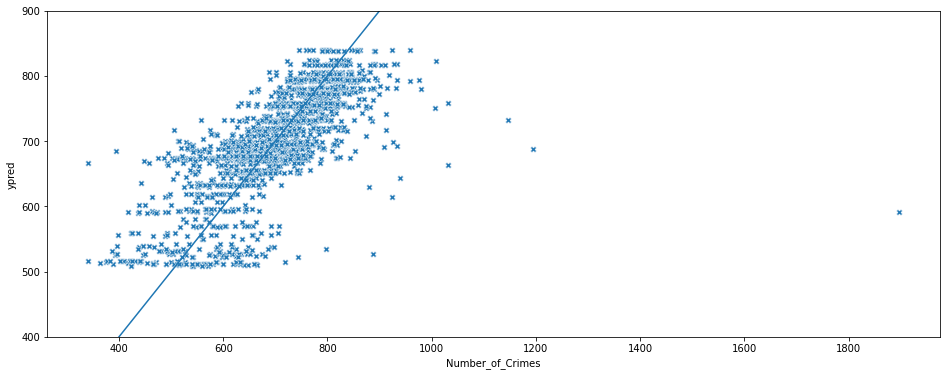

In [163]:
fig = plt.figure(figsize=(16,6))
sns.scatterplot(data=crimes_events2, x='Number_of_Crimes', y='ypred', marker='X',legend=False)
sns.lineplot(data=crimes_events2, x='Number_of_Crimes', y='Number_of_Crimes')
plt.ylim(400, 900)

In [153]:
difference = crimes_events2['Number_of_Crimes'] - crimes_events2['ypred']

<AxesSubplot:>

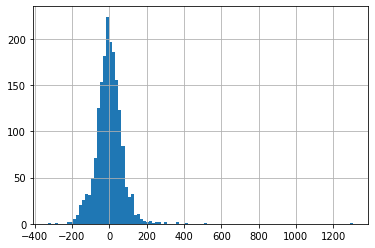

In [154]:
difference.hist(bins=100)

In [ ]:
plt.ylim(400, 900)

In [167]:
difference.shape[0]

(1827,)

In [165]:
difference.std()

75.36359543172013

In [176]:
crimes_events2.Number_of_Crimes.describe()

count    1827.000000
mean      699.087028
std       110.373009
min       340.000000
25%       634.000000
50%       709.000000
75%       775.000000
max      1897.000000
Name: Number_of_Crimes, dtype: float64

In [120]:
from statsmodels.api import OLS
from statsmodels.api import add_constant

# Specifying features and targets
X, y = add_constant(crimes_events2).drop(['Number_of_Crimes',"Year-Month-Day"], axis=1), crimes_events2.Number_of_Crimes # features, target

# Construction of model
model_fit=OLS(y, X).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number_of_Crimes   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     51.46
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          7.51e-312
Time:                        11:34:50   Log-Likelihood:                -10346.
No. Observations:                1827   AIC:                         2.080e+04
Df Residuals:                    1774   BIC:                         2.109e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                844.3129     11.873     71.112      0.000     821.026     867.599
Protests_Attendees     0.0001      0.000      0.741      0.459      -0.000       0.000
Year_2017             -0.2567      5.232     -0.049      0.961     -10.519      10.006
Year_2018             -1.4819      5.234     -0.283      0.777     -11.747       8.783
Year_2019            -22.5527      5.230     -4.312      0.000     -32.811     -12.295
Year_2020           -162.2703      5.227    -31.047      0.000    -172.521    -152.019
Month_2              -13.8487      8.257     -1.677      0.094     -30.043       2.345
Month_3              -11.9428      8.055     -1.483      0.138     -27.741       3.855
Month_4               -9.4435      8.130     -1.162      0.246     -25.389       6.502
Month_5               65.2296      8.057      8.096      0.000      49.428      81.031
Month_6               93.2444      8.127     11.473      0.000      77.304     109.184
Month_7              106.7614      8.057     13.251      0.000      90.960     122.563
Month_8              106.4710      8.057     13.214      0.000      90.668     122.274
Month_9               70.3347      8.133      8.648      0.000      54.383      86.286
Month_10              43.4491      8.056      5.393      0.000      27.649      59.250
Month_11               6.4986      8.133      0.799      0.424      -9.454      22.451
Month_12             -15.0178      8.058     -1.864      0.063     -30.822       0.787
Day_2               -146.9905     12.911    -11.385      0.000    -172.313    -121.668
Day_3               -136.6281     12.909    -10.584      0.000    -161.947    -111.309
Day_4               -143.2241     12.910    -11.094      0.000    -168.545    -117.903
Day_5               -141.0741     12.910    -10.927      0.000    -166.395    -115.753
Day_6               -144.7060     12.909    -11.209      0.000    -170.025    -119.387
Day_7               -156.6139     12.911    -12.130      0.000    -181.936    -131.292
Day_8               -156.7031     12.908    -12.140      0.000    -182.020    -131.386
Day_9               -160.7373     12.911    -12.450      0.000    -186.059    -135.415
Day_10              -154.6424     12.909    -11.979      0.000    -179.961    -129.324
Day_11              -168.0027     12.910    -13.013      0.000    -193.324    -142.681
Day_12              -163.1540     12.910    -12.637      0.000    -188.475    -137.833
Day_13              -158.2157     12.909    -12.256      0.000    -183.535    -132.897
Day_14              -158.1362     12.911    -12.248      0.000    -183.458    -132.814
Day_15              -133.9723     12.908    -10.379      0.000    -159.290    -108.655
Day_16              -137.3159     12.911    -10.636      0.000    -162.638    -111.994
Day_17              -141.7154     12.9

In [117]:
model_fit = model.fit()

In [118]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number_of_Crimes   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     99.78
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.71e-93
Time:                        11:33:05   Log-Likelihood:                -10965.
No. Observations:                1827   AIC:                         2.194e+04
Df Residuals:                    1821   BIC:                         2.197e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.075e+04   3267.350     21.653      0.000    6.43e+04    7.72e+04
Year                 -34.7197      1.619    -21.444      0.000     -37.895     -31.544
Month                  3.2673      0.665      4.911      0.000       1.963       4.572
Day                   -0.8571      0.260     -3.292      0.001      -1.368      -0.346
WeekDay                2.0540      1.146      1.792      0.073      -0.195       4.303
Protests_Attendees     0.0002      0.000      0.996      0.320      -0.000       0.001
==============================================================================
Omnibus:                      697.488   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20271.204
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                      19.148   Cond. No.                     1.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
import Assumptions

In [ ]:
tester=Assumptions.Assumption_Tester_OLS(crimes_events.drop("columns_to_drop", axis=1), y)

In [195]:
crimes_events["Year-Month-Day"].nunique()

1461

In [196]:
365*4+1

1461

In [202]:
crimes_events2["Year-Month-Day"].min()

'2016-01-01'